### Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('dataset2.csv')          #reading the dataset
df1.head()

,1,2,3,target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [3]:
df1=df1.drop_duplicates()           #droping duplicate rows

In [4]:
df1[df1['1'].isnull()]             #checking null values in '1' column

,1,2,3,target
279,NaN,0.28,15.0,NaN
1875,NaN,0.19,19.0,False
1981,NaN,0.15,11.0,False


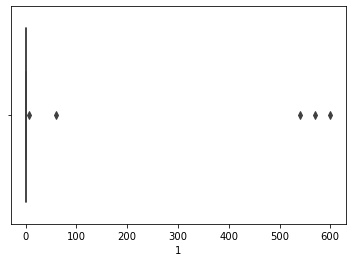

In [5]:
sns.boxplot(df1['1'])               #checking outliers by box plot

In [6]:
df1['1']=df1['1'].where(df1['1']<1,np.nan)       #replacing outliers with null values

In [7]:
df1['1'].isnull().sum()                         # total null values in feature '1'

8

In [8]:
df1.iloc[:,0]=df1.iloc[:,0].fillna(np.mean(df1[df1['1']<1]['1']))       #replacing null values with mean

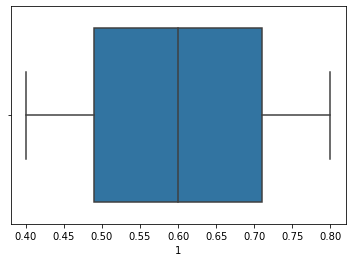

In [9]:
sns.boxplot(df1['1'])                                #checking for outliers

In [10]:
df1['1'].isnull().sum()

0

**we can see there is no outliers left**

In [11]:
df1[df1['2'].isnull()]                   #checking null values in '2' column    

,1,2,3,target
3,0.46,NaN,9.0,False
1921,0.40,NaN,21.0,False
1966,0.46,NaN,22.0,False


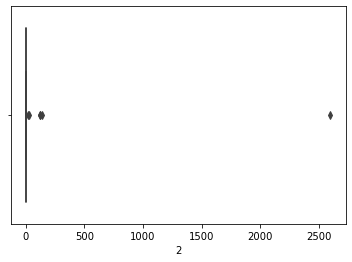

In [12]:
sns.boxplot(df1['2'])                              #checking outliers by box plot

In [13]:
df1['2']=df1['2'].where(df1['2']<1,np.nan)               #replacing outliers with null values

In [14]:
df1['2'].isnull().sum()                           # total null values in feature '2'

9

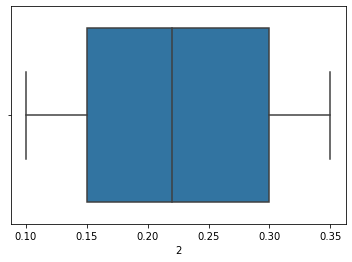

In [15]:
df1.iloc[:,1]=df1.iloc[:,1].fillna(np.mean(df1[df1['2']<1]['2']))               #replacing null values with mean
sns.boxplot(df1['2'])

In [16]:
df1['2'].isnull().sum()                   #checking for null values left

0

**we can see there is no null values left**

In [17]:
df1[df1['3'].isnull()]         #checking null values in '3' column

,1,2,3,target
2,0.54,0.19,NaN,True
291,0.54,0.21,NaN,False


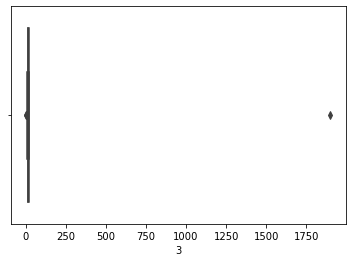

In [18]:
sns.boxplot(df1['3'])              #checking outliers by box plot

In [19]:
df1['3']=df1['3'].where(df1['3']<100,np.nan)       #replacing outliers with null values


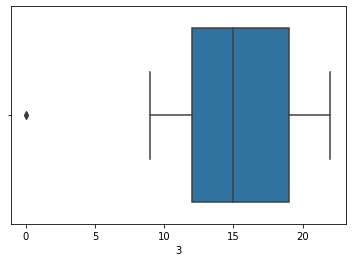

In [20]:
df1.iloc[:,2]=df1.iloc[:,2].fillna(np.mean(df1[df1['3']<100]['3']))      #replacing null values with mean
sns.boxplot(df1['3'])                                                     #checking outliers by box plot

In [21]:
df1['3']=df1['3'].where(df1['3']>5,np.nan)                      #replacing outliers with null values

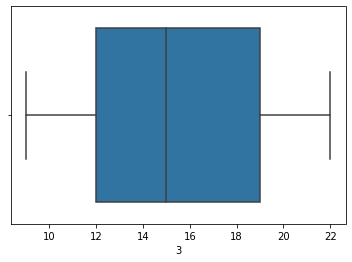

In [22]:
df1.iloc[:,2]=df1.iloc[:,2].fillna(np.mean(df1[df1['3']<100]['3']))            #replacing null values with mean
sns.boxplot(df1['3']) 

In [23]:
df1['3'].isnull().sum()  

0

**we can see there is no outliers left**

In [24]:
df1[df1['target'].isnull()]

,1,2,3,target
10,0.800000,0.12,18.0,NaN
32,0.460000,0.14,9.0,NaN
44,0.630000,0.31,22.0,NaN
62,0.740000,0.22,20.0,NaN
76,0.740000,0.33,13.0,NaN
94,0.600000,0.12,19.0,NaN
136,0.490000,0.33,19.0,NaN
279,0.598234,0.28,15.0,NaN
673,0.710000,0.30,17.0,NaN
1748,0.510000,0.28,11.0,NaN


In [25]:
df1['target'].isnull().sum()

11

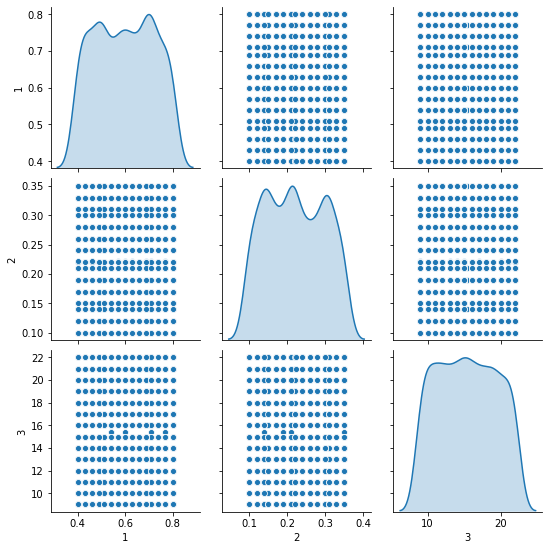

In [26]:
sns.pairplot(df1.drop('target',1),diag_kind='kde')

In [27]:
#from above we can see that all features seems like a gussian curve
#so no transformation is required

In [28]:
df2=df1.dropna()             #droping the rows containing null values
df2.shape

(1984, 4)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()                         # labelencoding the target column
le.fit(df2['target'])                   #I use fit here because in prediction file I can use it to inverse transform the labels.

LabelEncoder()

In [31]:
df2['target']=le.transform(df2['target'])

In [32]:
df2.head()

,1,2,3,target
0,0.60,0.310000,13.00000,0
1,0.74,0.330000,21.00000,0
2,0.54,0.190000,15.38755,1
3,0.46,0.222638,9.00000,0
4,0.77,0.150000,15.00000,1


### Fitting models

In [33]:
X=df2.drop('target',1)
y=df2['target']

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

0.9541292320186793

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

model = log_reg.fit(X_train,y_train)
print(f'R^2 score for train: {log_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {log_reg.score(X_test, y_test)}')

R^2 score for train: 0.9445244956772334
R^2 score for test: 0.9496644295302014


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

scores = cross_val_score(dt, X, y, cv=10)
scores.mean()

0.9692680574590122

In [36]:
model = dt.fit(X_train,y_train)
print(f'R^2 score for train: {dt.score(X_train, y_train)}')
print(f'R^2 score for test: {dt.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 0.9580536912751678


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

scores = cross_val_score(rf, X, y, cv=10)
scores.mean()

0.9743058727983349

In [38]:
model = rf.fit(X_train,y_train)
print(f'R^2 score for train: {rf.score(X_train, y_train)}')
print(f'R^2 score for test: {rf.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 0.9765100671140939


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

scores = cross_val_score(knn, X, y, cv=10)
scores.mean()

0.9707730572052178

In [40]:
model = knn.fit(X_train,y_train)
print(f'R^2 score for train: {knn.score(X_train, y_train)}')
print(f'R^2 score for test: {knn.score(X_test, y_test)}')

R^2 score for train: 0.9776657060518732
R^2 score for test: 0.9697986577181208


In knn model we are getting training score as 97.76% and testing score as 96.97 and cross validation score is 97%.
there is slightly overfitting but we can consider this model because the difference between training and testing score is very negligible so i will take this as the final model.

In [41]:
dfp=pd.read_csv('prediction2.csv')
dfp.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [42]:
dfp.iloc[:,0]=dfp.iloc[:,0].fillna(np.mean(dfp['1']))

In [43]:
dfp.iloc[:,1]=dfp.iloc[:,1].fillna(np.mean(dfp['2']))

In [44]:
dfp.iloc[:,2]=dfp.iloc[:,2].fillna(np.mean(dfp['3']))

In [45]:
dfp.isnull().sum()

1    0
2    0
3    0
dtype: int64

In [46]:
dfp['target']=knn.predict(dfp)               # predicting the target column

In [47]:
dfp['target']=le.inverse_transform(dfp['target'])    #here transforming back the target column to True & False

In [48]:
dfp.to_csv('solution2.csv')